# <font color='orange'>**DATA PRE-PROCESSING**</font>

## <font color = 'sky blue'>**Import Libraries**</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import glob

## <font color = 'sky blue'>**Load Dataset**</font>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
PATH = "/content/drive/My Drive/Dataset/"
path = "/content/drive/My Drive/Dataset/Trimmed_raw_data/..."

Mounted at /content/drive


In [45]:
#Download
df = pd.read_csv(f"{PATH}Mod_all.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time_start     36000 non-null  float64
 1   accelerationX  36000 non-null  float64
 2   accelerationY  36000 non-null  float64
 3   accelerationZ  36000 non-null  float64
 4   time_end       36000 non-null  float64
 5   rotationX      36000 non-null  float64
 6   rotationY      36000 non-null  float64
 7   rotationZ      36000 non-null  float64
 8   Class          36000 non-null  int64  
 9   Activity       36000 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 2.7+ MB


In [ ]:
df.head(5)

,time_start,accelerationX,accelerationY,accelerationZ,time_end,rotationX,rotationY,rotationZ,Class,Activity
0,0.003,0.004230,0.005034,-0.020325,0.005,-0.000043,0.012474,-0.000880,0,Stand
1,0.013,-0.000280,0.011153,-0.022526,0.014,-0.000654,0.011252,-0.001491,0,Stand
2,0.021,-0.013218,0.026723,-0.023402,0.023,-0.002486,0.002089,-0.002101,0,Stand
3,0.031,-0.006041,0.035018,-0.004268,0.033,-0.004930,0.005143,-0.000880,0,Stand
4,0.041,0.019178,0.045794,-0.002172,0.043,-0.007373,0.005754,-0.000880,0,Stand


In [14]:
from sklearn.utils import shuffle
df1 = shuffle(df)

In [15]:
df1.head(10)

,time_start,accelerationX,accelerationY,accelerationZ,time_end,rotationX,rotationY,rotationZ,Class,Activity
15998,20.029,1.819600,0.492540,-1.13530,20.003,0.115140,-1.452300,1.435600,7,Pick
33130,11.309,-4.785400,-0.218340,2.03770,11.304,0.849630,0.431890,-0.153100,16,Stair-down
9197,11.985,-0.091543,0.037192,0.06503,11.987,-0.009762,-0.891830,0.056456,4,Stand-sit
19166,2.613,0.968140,0.449060,1.74310,2.615,0.255270,0.601390,-0.010831,9,Push-up
14483,4.857,-1.026000,-0.446380,1.08500,4.843,0.497540,1.157900,-0.589400,7,Pick
28895,11.462,2.161900,5.597700,9.77400,11.457,0.350550,0.097134,-0.255720,14,Run
33883,18.839,-4.560600,-1.145800,-0.74783,18.834,-0.233440,0.317050,0.254350,16,Stair-down
32586,5.869,1.052700,-0.821220,-3.17960,5.864,1.189300,-0.326200,-0.454860,16,Stair-down
28080,3.302,-3.074200,-0.743700,1.46540,3.307,0.483720,-0.393390,0.289170,14,Run
28169,4.192,9.602200,-1.863100,-2.73520,4.197,-0.922490,0.185710,0.055821,14,Run


In [ ]:
df.tail(5)

,time_start,accelerationX,accelerationY,accelerationZ,time_end,rotationX,rotationY,rotationZ,Class,Activity
35995,20.178,4.5568,11.6880,11.753,20.174,5.9675,-0.69108,0.73267,17,Table-tennis
35996,20.185,-0.5298,22.0310,12.179,20.184,6.4490,1.52570,-0.14511,17,Table-tennis
35997,20.195,-7.6343,19.2980,13.130,20.196,6.1039,3.01390,0.10097,17,Table-tennis
35998,20.203,-11.1840,12.9270,19.533,20.203,4.5028,2.85520,0.89778,17,Table-tennis
35999,20.216,-7.5609,7.0837,13.038,20.215,2.3392,1.36910,1.26960,17,Table-tennis


## <font color = 'sky blue'>**Features and Target**</font>

In [46]:
df.drop_duplicates()
df.dropna()
target = df['Class']
features = df.drop(['Activity','Class'], axis=1)
features.head()

,time_start,accelerationX,accelerationY,accelerationZ,time_end,rotationX,rotationY,rotationZ
0,0.003,0.004230,0.005034,-0.020325,0.005,-0.000043,0.012474,-0.000880
1,0.013,-0.000280,0.011153,-0.022526,0.014,-0.000654,0.011252,-0.001491
2,0.021,-0.013218,0.026723,-0.023402,0.023,-0.002486,0.002089,-0.002101
3,0.031,-0.006041,0.035018,-0.004268,0.033,-0.004930,0.005143,-0.000880
4,0.041,0.019178,0.045794,-0.002172,0.043,-0.007373,0.005754,-0.000880


## <font color = 'sky blue'>**Features Selection**</font>

In [47]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression,mutual_info_classif

#Select top 6 features based on mutual info regression
selector = SelectKBest(mutual_info_classif, k =6)
selector.fit(features, target)
features.columns[selector.get_support()]

Index(['accelerationX', 'accelerationY', 'accelerationZ', 'rotationX',
       'rotationY', 'rotationZ'],
      dtype='object')

In [7]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

#Selecting the Best 6 features according to DTC
rfe_selector = RFE(estimator=DecisionTreeClassifier(),n_features_to_select = 6, step = 1)
rfe_selector.fit(features, target)
features.columns[rfe_selector.get_support()]

Index(['accelerationX', 'accelerationZ', 'time_end', 'rotationX', 'rotationY',
       'rotationZ'],
      dtype='object')

In [48]:
features_less = df.drop(['Activity','Class','time_start','time_end'], axis=1)
features_less.head()

,accelerationX,accelerationY,accelerationZ,rotationX,rotationY,rotationZ
0,0.004230,0.005034,-0.020325,-0.000043,0.012474,-0.000880
1,-0.000280,0.011153,-0.022526,-0.000654,0.011252,-0.001491
2,-0.013218,0.026723,-0.023402,-0.002486,0.002089,-0.002101
3,-0.006041,0.035018,-0.004268,-0.004930,0.005143,-0.000880
4,0.019178,0.045794,-0.002172,-0.007373,0.005754,-0.000880


## <font color = 'sky blue'>**Data Distribution Analysis**</font>

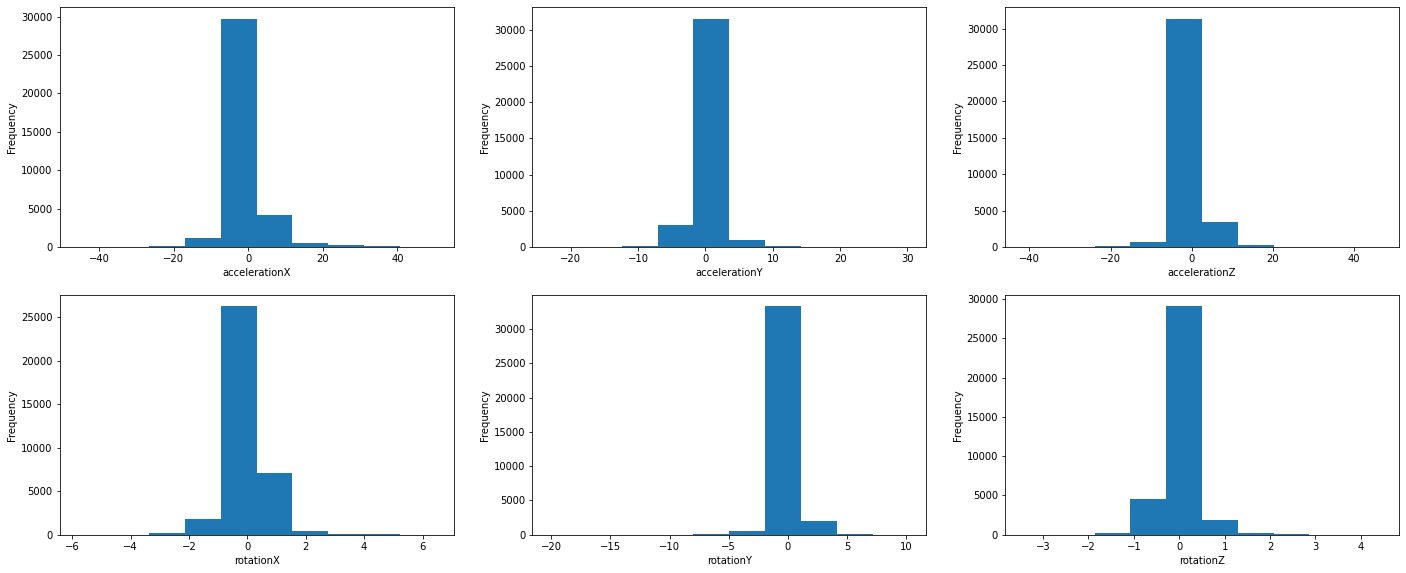

In [ ]:
fig = plt.figure(figsize = (24,15))
i=0
for column in features_less:
  sub = fig.add_subplot(3,3, i+1)
  sub.set_xlabel(column)
  features_less[column].plot(kind='hist')
  i= i+1

## <font color = 'sky blue'>**Splitting the dataset into train-test**</font>

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    features_less,
    target,
    stratify=target,
    test_size=0.2,
    random_state=42)

x_train.shape, x_test.shape

((28800, 6), (7200, 6))

In [ ]:
#Frequency distribution of classes
train_outcome = pd.crosstab(index=y_train, 
                              columns="count")      
train_outcome

col_0,count
Class,
0,1600
1,1600
2,1600
3,1600
4,1600
5,1600
6,1600
7,1600
8,1600


In [ ]:
#Frequency distribution of classes
test_outcome = pd.crosstab(index=y_test, 
                              columns="count")      
test_outcome

col_0,count
Class,
0,400
1,400
2,400
3,400
4,400
5,400
6,400
7,400
8,400


## <font color = 'sky blue'>**Feature Scaling**</font>

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
print(x_train)

[[ 4.20244230e-02 -3.51516673e-02 -6.73062402e-01  2.08525458e-01
  -2.60332885e-02  6.32283291e-01]
 [-1.27402679e-01 -3.58669087e-02 -5.14508871e-02  3.54587604e-01
   1.60487106e+00  2.54017977e-01]
 [ 2.99048017e-02 -2.07074888e-02 -1.47406551e-02 -1.45871893e-02
   9.98043196e-02 -5.89363500e-02]
 ...
 [-6.67017571e-02 -5.00109911e-03 -5.20298410e-02 -1.20572970e-01
  -4.86861141e-01 -2.34244816e-02]
 [-4.62856515e-03 -5.32215855e-03 -8.36358537e-03 -7.18593529e-02
   1.56820680e-02  1.14166509e-03]
 [ 1.05583192e-01 -6.68073805e-01  8.37294812e-02  1.38389777e+00
   3.07126987e-01  4.05358785e-01]]


## <font color = 'sky blue'>**Import Libraries**</font>

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## <font color = 'sky blue'>**All Models**</font>

In [19]:
model_pipeline = []
model_pipeline.append(LogisticRegression(multi_class='ovr',solver='saga'))
model_pipeline.append(SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo'))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier(n_estimators = 100))
model_pipeline.append(GaussianNB())

In [20]:
model_list = ['Logistics regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []
f1_score = []
roc = []
y_comp = y_test

for model in model_pipeline:
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  y_comp = np.column_stack((y_comp,y_pred))
  y_comp_df = pd.DataFrame(y_comp)
  
  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  cm_list.append(confusion_matrix(y_test, y_pred))
  f1_score.append(round(metrics.f1_score(y_test, y_pred,average='micro'),2))
# plt.show()
#print(roc)
print('Actual      :     Predicted \n')
y_comp_df.head(15)


Actual      :     Predicted 



,0,1,2,3,4,5,6
0,14,6,16,13,13,13,11
1,16,0,0,0,2,16,0
2,1,1,1,1,1,1,1
3,3,17,3,3,3,3,3
4,9,13,6,6,6,9,6
5,16,16,16,16,10,16,7
6,2,12,2,2,10,2,2
7,15,15,15,15,15,15,15
8,6,6,6,6,10,6,4
9,1,1,1,1,1,1,1


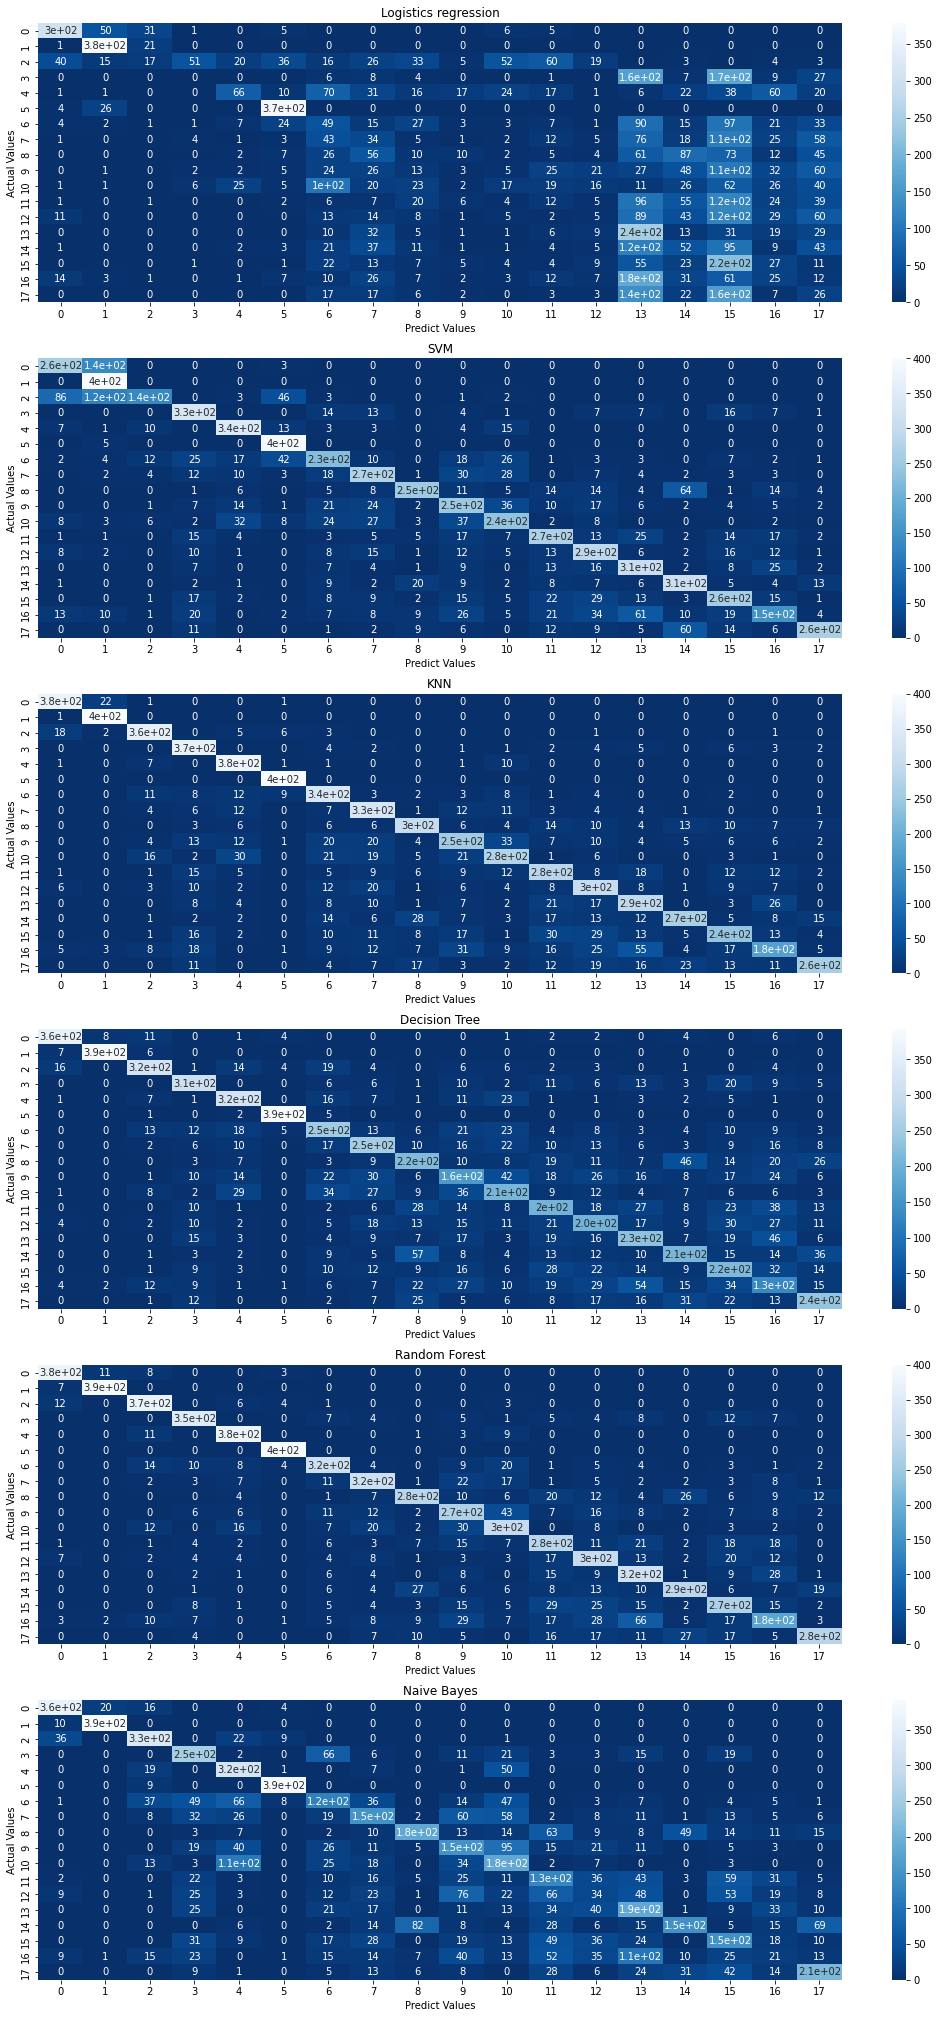

In [23]:
fig = plt.figure(figsize = (18,36))
for i in range(len(cm_list)):
  cm = cm_list[i]
  model = model_list[i]
  sub = fig.add_subplot(6, 1, i+1).set_title(model)
  cm_plot = sns.heatmap(cm, annot=True, cmap='Blues_r')
  cm_plot.set_xlabel('Predict Values')
  cm_plot.set_ylabel('Actual Values')

In [24]:

result_df = pd.DataFrame({'Model':model_list, 'Accuracy':acc_list, 'F1 Score': f1_score})
result_df

,Model,Accuracy,F1 Score
0,Logistics regression,0.253889,0.25
1,SVM,0.687500,0.69
2,KNN,0.780000,0.78
3,Decision Tree,0.639444,0.64
4,Random Forest,0.787917,0.79
5,Naive Bayes,0.515278,0.52


In [52]:
lr = LogisticRegression(multi_class='ovr',solver='saga').fit(x_train, y_train)

y_lr = lr.predict(x_test)

In [64]:
accuracy = metrics.accuracy_score(y_test, y_lr)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_lr,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_lr,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_lr,pos_label='positive',average='macro')
print('F1 score: %f' % f1)



Accuracy: 0.253750
Precision: 0.235157
Recall: 0.253750
F1 score: 0.218591


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [58]:
kn = KNeighborsClassifier().fit(x_train, y_train)

y_kn = kn.predict(x_test)

In [66]:
accuracy = metrics.accuracy_score(y_test, y_kn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_kn,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_kn,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_kn,pos_label='positive',average='macro')
print('F1 score: %f' % f1)


Accuracy: 0.780000
Precision: 0.779432
Recall: 0.780000
F1 score: 0.775206


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [60]:
sv = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(x_train, y_train)
y_sv = sv.predict(x_test)

In [65]:
accuracy = metrics.accuracy_score(y_test, y_sv)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_sv,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_sv,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_sv,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.687500
Precision: 0.696578
Recall: 0.687500
F1 score: 0.679272


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [67]:
dt = DecisionTreeClassifier().fit(x_train, y_train)
y_dt = dt.predict(x_test)

In [68]:
accuracy = metrics.accuracy_score(y_test, y_dt)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_dt,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_dt,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_dt,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.638194
Precision: 0.637912
Recall: 0.638194
F1 score: 0.637763


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [70]:

nb =GaussianNB().fit(x_train, y_train)
y_nb = nb.predict(x_test)

In [71]:
accuracy = metrics.accuracy_score(y_test, y_nb)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_nb,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_nb,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_nb,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.515278
Precision: 0.502659
Recall: 0.515278
F1 score: 0.501826


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


## <font color = 'sky blue'>**Random Forest**</font>

In [25]:
rf = RandomForestClassifier(n_estimators = 100).fit(x_train, y_train)

y_predict = rf.predict(x_test)

In [69]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_predict,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_predict,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_predict,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.789861
Precision: 0.790848
Recall: 0.789861
F1 score: 0.788240


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [27]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_predict)
print(cf_matrix)

[[377  10  10   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8 392   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 13   0 369   0   8   4   3   1   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0 347   0   0   8   5   0   5   1   2   2  11   0  14   5   0]
 [  0   0   9   0 376   0   1   0   1   1  12   0   0   0   0   0   0   0]
 [  0   0   0   0   0 399   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0  13  11  12   3 311   4   1  11  18   0   5   3   1   6   0   1]
 [  0   0   3   4   7   0   8 318   1  21  18   1   6   3   1   2   6   1]
 [  0   0   0   0   4   0   1   7 295   9   4  17   9   4  20   7   8  15]
 [  0   0   0   5   8   0   9  15   1 263  49   9  18   7   1   5   9   1]
 [  0   0  12   0  18   0   7  24   1  33 295   0   8   0   0   1   1   0]
 [  1   0   1   3   4   0   9   3   3  20   7 284  10  22   1  14  18   0]
 [  7   0   3   3   1   0   6   9   1   5   4  14 307   7   3  16  14   0]
 [  0   0   0   4   1   0

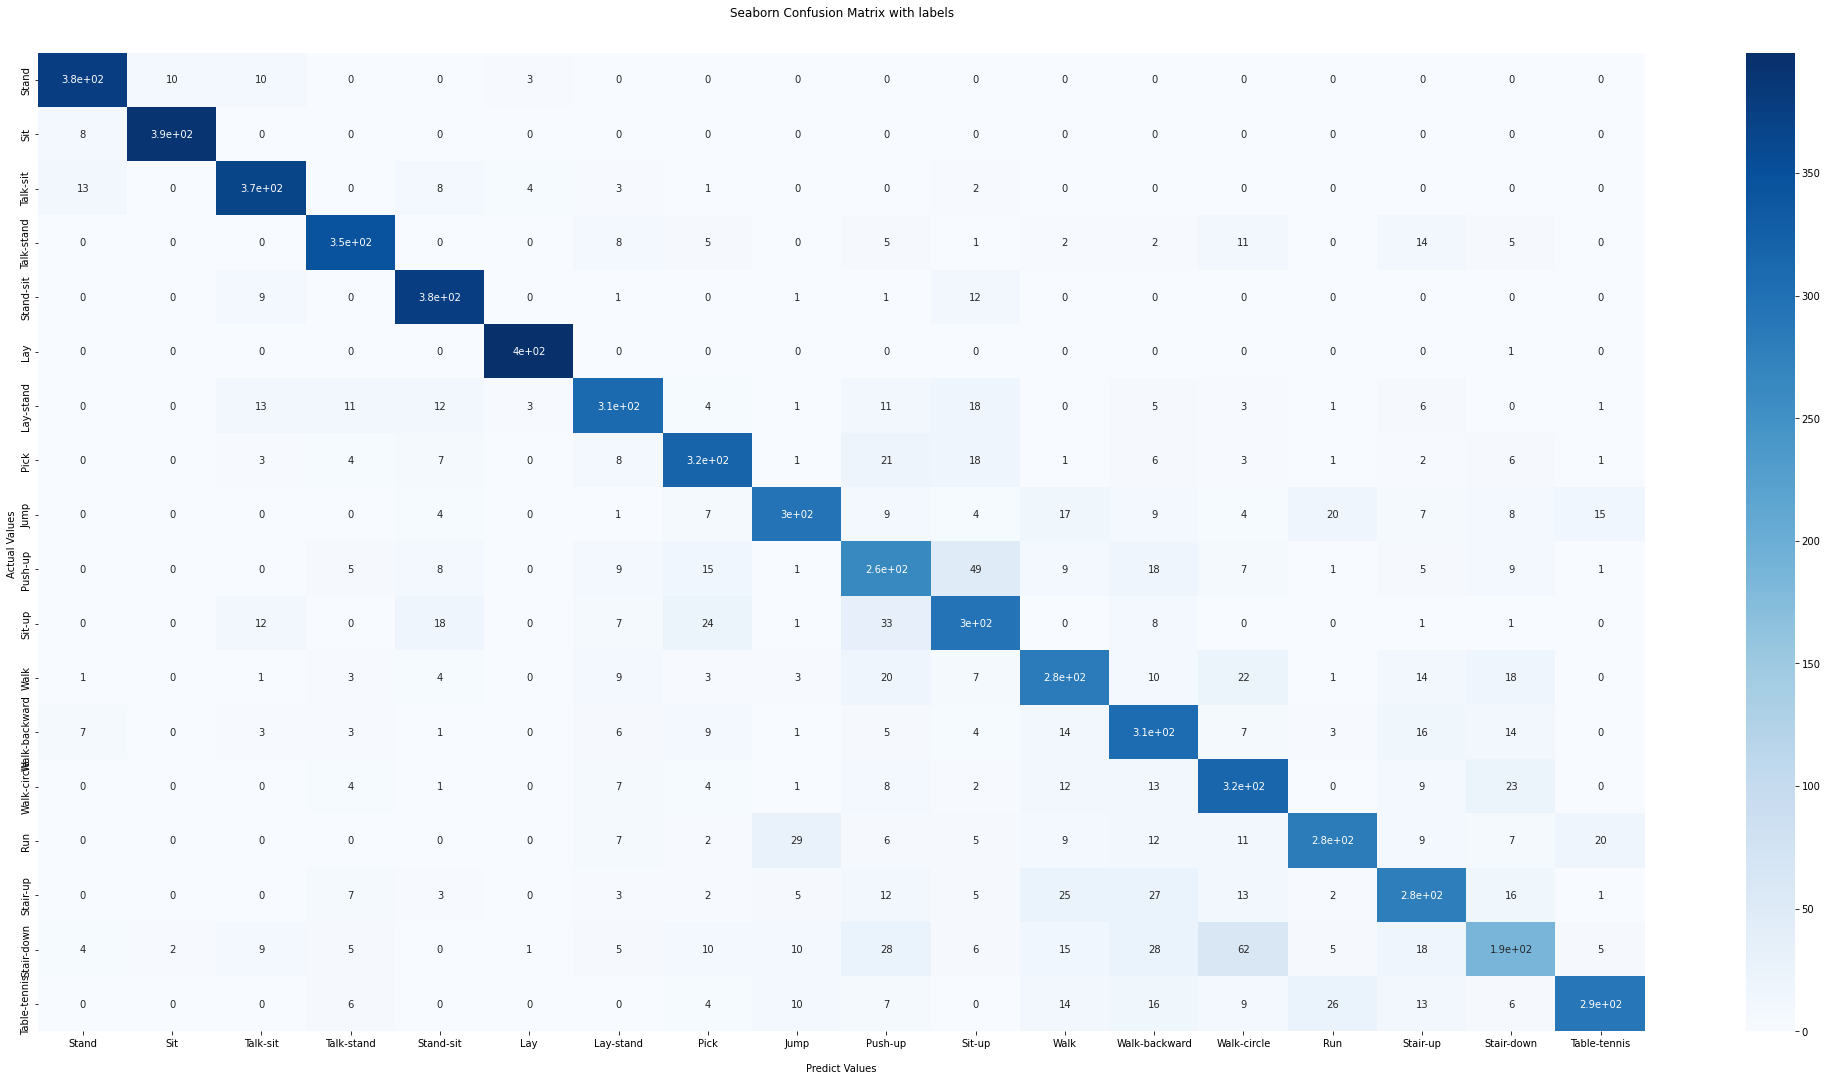

<Figure size 432x288 with 0 Axes>

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(36)
f.set_figheight(18)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredict Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Stand','Sit','Talk-sit','Talk-stand','Stand-sit','Lay','Lay-stand','Pick','Jump','Push-up','Sit-up','Walk','Walk-backward',
'Walk-circle','Run','Stair-up','Stair-down','Table-tennis'])
ax.yaxis.set_ticklabels(['Stand','Sit','Talk-sit','Talk-stand','Stand-sit','Lay','Lay-stand','Pick','Jump','Push-up','Sit-up','Walk','Walk-backward',
'Walk-circle','Run','Stair-up','Stair-down','Table-tennis'])


# print("Plot after re-sizing: ")
# plt.plot(x, y)
# plt.show()

# ## Display the visualization of the Confusion Matrix.
# plt.figure(figsize = (18,36))
plt.show()
f.savefig('sfsdf.png')

In [ ]:
result = classification_report(y_test, y_predict)
print("Classification Report:")
print (result)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       400
           1       0.97      0.98      0.98       400
           2       0.84      0.93      0.88       400
           3       0.86      0.86      0.86       400
           4       0.85      0.95      0.90       400
           5       0.97      1.00      0.99       400
           6       0.82      0.76      0.79       400
           7       0.82      0.80      0.81       400
           8       0.83      0.73      0.78       400
           9       0.62      0.67      0.64       400
          10       0.70      0.74      0.72       400
          11       0.70      0.71      0.70       400
          12       0.65      0.77      0.70       400
          13       0.69      0.78      0.73       400
          14       0.83      0.72      0.77       400
          15       0.69      0.69      0.69       400
          16       0.60      0.45      0.52       400
    

In [35]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

y_train = label_binarize(y_train, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
n_classes = 18

# classifier
#rf = RandomForestClassifier(n_estimators = 100).fit(x_train, y_train)
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 100)).fit(x_train, y_train)
y_score = clf.predict(x_test)


In [36]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

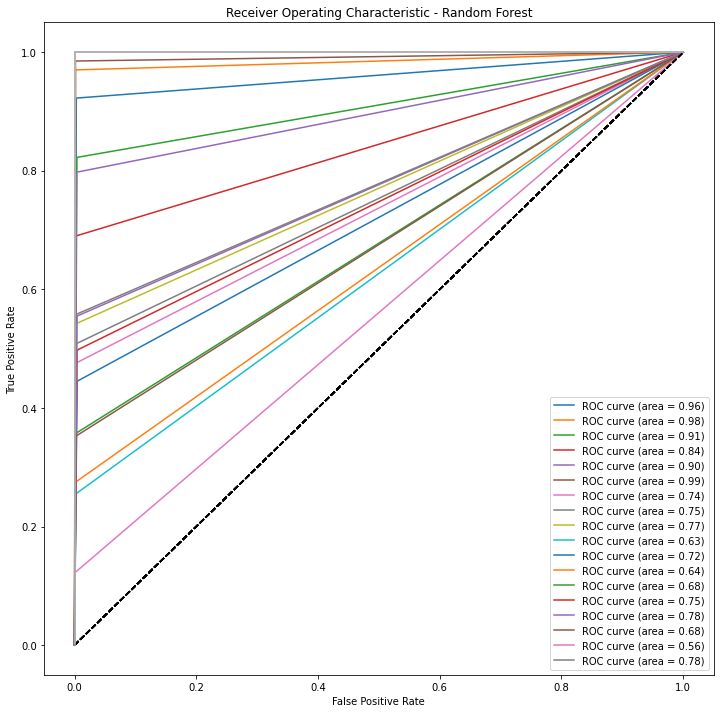

<Figure size 432x288 with 0 Axes>

In [41]:
# Plot of a ROC curve for a specific class
fi = plt.figure()
fi.set_figwidth(12)
fi.set_figheight(12)
# plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

plt.show()
plt.savefig('mhg.png')
fi.savefig('sfs.png')

## <font color = 'sky blue'>**Ada Boost**</font>

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=100, learning_rate=1
).fit(x_train, y_train)

y_pred = ada.predict(x_test)


# bdt_discrete = AdaBoostClassifier(
#     DecisionTreeClassifier(max_depth=2),
#     n_estimators=300,
#     learning_rate=1.5,
#     algorithm="SAMME",
# )


In [75]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_pred,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_pred,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.218056
Precision: 0.199463
Recall: 0.218056
F1 score: 0.158055


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (

In [ ]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[293  27   8   0   0   3   0   0   0   0   0   9  17   0   0   0  43   0]
 [ 23 377   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 26   1 274   0  12   4  21   0   0   0  17  12  22   0   2   0   9   0]
 [  0   0   0  64   2   0  34  79   7  55  38  34  13   6  50   8  10   0]
 [  0   0  12   0 119   0  44  19   0  27 133   9  14   0  21   0   2   0]
 [  0   0   0   0   0 394   5   0   0   0   0   0   0   0   0   0   1   0]
 [  1   0  13   9  24  12  51  40   1  76  83  21  23   0  12  32   2   0]
 [  0   0   3  16  11   0   5 105   3  79  71  27  15  25  28  11   1   0]
 [  0   0   0  18   6   0   1  98  33  77  51  18   2  24  36  36   0   0]
 [  0   0   1   7  15   0  11  80  11  85 120  22   6   2  32   8   0   0]
 [  0   0  11   0  38   0  12  55  26  41 142  22   7   3  38   2   3   0]
 [  2   0   0   9   1   0   4 132  17  96  52  16   3   4  50  14   0   0]
 [ 10   0   0  24   9   0   6 144  13  58  39   7   3  10  59  18   0   0]
 [  0  

## <font color = 'sky blue'>**Gradient Boosting**</font>

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)

# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

In [77]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_pred,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_pred,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.636250
Precision: 0.633032
Recall: 0.636250
F1 score: 0.631224


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [ ]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[366  12  17   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0]
 [  7 390   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 23   3 349   0  13   3   1   2   0   0   6   0   0   0   0   0   0   0]
 [  0   0   0 297   0   0  27   9   0   6   1   6  12  14   0  19   7   2]
 [  0   0  14   0 340   2   7   1   0   6  28   1   0   1   0   0   0   0]
 [  0   0   1   0   0 399   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0  35  30  33   7 188  17   1  18  37   2   5   8   0  14   2   2]
 [  0   0   5  20  10   0  25 186   3  48  36  12  24   6   1   9   7   8]
 [  0   0   0   2   6   0   3   5 237  17   7  21  15   4  42  10  16  15]
 [  0   0   2   8  17   0  24  25   1 206  51  17  25   4   1   6  11   2]
 [  1   0  14   3  29   0  16  28   1  42 246   4  14   0   0   1   1   0]
 [  2   0   0  16   3   0   7   9  10  22   8 196  29  23   6  34  27   8]
 [  9   0   1   7   4   0  11  15   1  24   6  28 212  21   2  41  17   1]
 [  0  

## <font color = 'sky blue'>**Sep**</font>

In [44]:

lr = LogisticRegression(multi_class='ovr',solver='saga').fit(x_train, y_train)

y_lr = lr.predict(x_test)

ValueError: ignored

In [ ]:
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)